# Exercises week 36

## Deriving and Implementing Ridge Regression

## Learning goals

After completing these exercises, you will know how to
- Take more derivatives of simple products between vectors and matrices
- Implement Ridge regression using the analytical expressions
- Scale data appropriately for linear regression
- Evaluate a model across two different hyperparameters

## Exercise 1 - Choice of model and degrees of freedom

**a)** How many degrees of freedom does an OLS model fit to the features $x, x^2, x^3$ and the intercept have?

A: It has four degrees of freedom.

**b)** Why is it bad for a model to have too many degrees of freedom?

A: Because it adds complexity to the point where alot of datapoint are needed to make a good fit. Generally dont want to capture the noise in the data. Overfitting.

**c)** Why is it bad for a model to have too few degrees of freedom?

A: Because then you can end up having a model that does not accurately fits the data, too low resolution. Underfitting.

**d)** Read [chapter 3.4.1 of Hastie et al.'s book](https://link.springer.com/book/10.1007/978-0-387-84858-7). What is the expression for the effective degrees of freedom of the ridge regression fit?

A: $$df(\lambda) = \sum_{j=1}^{p} \frac{d_j^2}{d_j^2 + \lambda}$$

**e)** Why might we want to use Ridge regression instead of OLS?

A: In cases where the variables are higly corelated or the model require high dimentionality we might want to use Ridge due to its L2 penalization feature. This shrinks the coefficients, avoiding instability.

**f)** Why migth we want to use OLS instead of Ridge regression?

A: When we have no significant multicollinearity it is no need to introduce an unnecessary bias. 

## Exercise 2 - Deriving the expression for Ridge Regression

The aim here is to derive the expression for the optimal parameters using Ridge regression.

The expression for the standard Mean Squared Error (MSE) which we used to define our cost function and the equations for the ordinary least squares (OLS) method, was given by the optimization problem

$$
{\displaystyle \min_{\boldsymbol{\beta}\in {\mathbb{R}}^{p}}}\frac{1}{n}\left\{\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)\right\}.
$$

By minimizing the above equation with respect to the parameters $\boldsymbol{\beta}$ we could then obtain an analytical expression for the parameters $\boldsymbol{\hat\beta_{OLS}}$.

We can add a regularization parameter $\lambda$ by
defining a new cost function to be optimized, that is

$$
{\displaystyle \min_{\boldsymbol{\beta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2+\lambda\vert\vert \boldsymbol{\beta}\vert\vert_2^2
$$

which leads to the Ridge regression minimization problem. (One can require as part of the optimization problem that $\vert\vert \boldsymbol{\beta}\vert\vert_2^2\le t$, where $t$ is a finite number larger than zero. We will not implement that in this course.)

### a) Expression for Ridge regression

Show that the optimal parameters

$$
\hat{\boldsymbol{\beta}}_{\mathrm{Ridge}} = \left(\boldsymbol{X}^T\boldsymbol{X}+\lambda\boldsymbol{I}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y},
$$

with $\boldsymbol{I}$ being a $p\times p$ identity matrix.

The ordinary least squares result is

$$
\hat{\boldsymbol{\beta}}_{\mathrm{OLS}} = \left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y},
$$

Answer:

We start by minimizing the cost function with respect to $\beta$ . To do this we take the derivative of the cost function (gradient) and put it equal to zero:

Expand: 

$J(\boldsymbol{\beta}) = \|\boldsymbol{y} - \boldsymbol{X} \boldsymbol{\beta}\|_2^2 + \lambda \|\boldsymbol{\beta}\|_2^2 = (\boldsymbol{y} - \boldsymbol{X} \boldsymbol{\beta})^T (\boldsymbol{y} - \boldsymbol{X} \boldsymbol{\beta}) + \lambda \boldsymbol{\beta}^T \boldsymbol{\beta}.$

Find gradient:

$$\frac{\partial J(\boldsymbol{\beta})}{\partial \boldsymbol{\beta}} = -2 \boldsymbol{X}^T (\boldsymbol{y} - \boldsymbol{X} \boldsymbol{\beta}) + 2 \lambda \boldsymbol{\beta}.$$

Put gradient to equal zero and solve for $\beta$:

$-2 \boldsymbol{X}^T (\boldsymbol{y} - \boldsymbol{X} \boldsymbol{\beta}) + 2 \lambda \boldsymbol{\beta} = 0,$

$\boldsymbol{X}^T (\boldsymbol{y} - \boldsymbol{X} \boldsymbol{\beta}) = \lambda \boldsymbol{\beta},$

$\boldsymbol{X}^T \boldsymbol{y} - {X}^T \boldsymbol{X} \boldsymbol{\beta} = \lambda \boldsymbol{\beta},$

$\boldsymbol{X}^T \boldsymbol{y} = \boldsymbol{X}^T \boldsymbol{X} \boldsymbol{\beta} + \lambda \boldsymbol{\beta}$

Now we take the $\boldsymbol{\beta}$ out of the paranthesis and insert the identity matrix $\boldsymbol{I}$ for completeness:

$\boldsymbol{X}^T \boldsymbol{y} = (\boldsymbol{X}^T \boldsymbol{X} + \lambda {I}) \boldsymbol{\beta}$

$\hat{\boldsymbol{\beta}}_{\mathrm{Ridge}} = (\boldsymbol{X}^T \boldsymbol{X} + \lambda \boldsymbol{I})^{-1} \boldsymbol{X}^T \boldsymbol{y}$






## Exercise 3 - Scaling data

In [1905]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**a)** Adapt your function from last week to only include the intercept column if the boolean argument `intercept` is set to true.

In [1906]:
n = 100
x = np.linspace(-3, 3, n)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + np.random.normal(0, 0.1)

def polynomial_features(x, p, intercept = False):
    n = len(x)
    if intercept:
        X = np.ones((n,p+1))
        for i in range(1, p+1):
            X[:, i] = x**i
    else:
        X = np.zeros((n, p))
        for i in range(1, p + 1):
            X[:, i - 1] = x ** i
    return X

p = 3
X1 = polynomial_features(x, p, intercept=True)
X2 = polynomial_features(x, p, intercept=False)
print(X1.shape, X2.shape)

(100, 4) (100, 3)


**b)** Split your data into training and test data(80/20 split)

In [1907]:
X = polynomial_features(x, p)

In [1908]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
x_train = X_train[:, 0] # These are used for plotting
x_test = X_test[:, 0] # These are used for plotting

**c)** Scale your design matrix with the sklearn standard scaler, though based on the mean and standard deviation of the training data only.

In [1909]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)
y_offset = np.mean(y_train)

## Exercise 4 - Implementing Ridge Regression

**a)** Implement a function for computing the optimal Ridge parameters using the expression from **2a)**.

In [1910]:
def Ridge_parameters(X, y, lambda_reg = 0.1):
    # Assumes X is scaled and has no intercept column
    # We have to introduse the term (lambda*I):
    pred = X.shape[1]
    I = np.eye(pred) # pxp identity

    return np.linalg.inv((X.T @ X)+I*lambda_reg) @ X.T @ y


beta = Ridge_parameters(X_train_s, y_train - y_offset)

**b)** Fit a model to the data, and plot the prediction using both the training and test x-values extracted before scaling, and the y_offset.

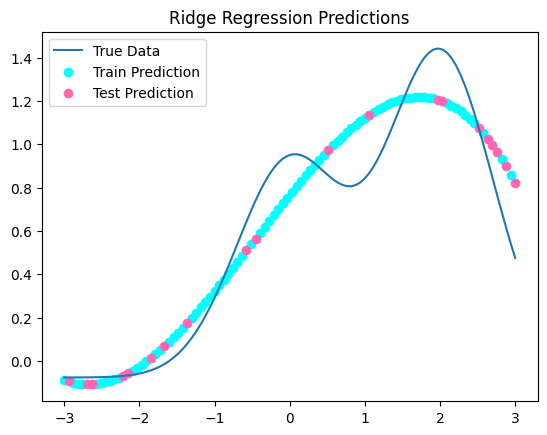

In [1911]:
lambda_reg = 0.01
p= 3

beta = Ridge_parameters(X_train_s, y_train - y_offset, lambda_reg)

#Generaate matrix X and remove intercept column
X_train_poly = polynomial_features(x_train, p, intercept=False)
X_test_poly = polynomial_features(x_test, p, intercept=False)
#Scale
X_train_poly_s = scaler.transform(X_train_poly)
X_test_poly_s = scaler.transform(X_test_poly)
#Predict
y_hat_train = X_train_poly_s @ beta + y_offset
y_hat_test = X_test_poly_s @ beta + y_offset

plt.plot(x, y, label='True Data')
plt.scatter(x_train, y_hat_train, color='cyan', label='Train Prediction')
plt.scatter(x_test, y_hat_test, color='hotpink', label='Test Prediction')
plt.legend()
plt.title('Ridge Regression Predictions')
plt.show()


## Exercise 4 - Testing multiple hyperparameters

**a)** Compute the MSE of your ridge model for polynomials of degrees 1 to 5 with lambda set to 0.01. Plot the MSE as a function of polynomial degree.

**b)** Compute the MSE of your ridge model for a polynomial with degree 3, and with lambdas from $10^{-1}$ to $10^{-5}$ on a logarithmic scale. Plot the MSE as a function of lambda.

**c)** Compute the MSE of your ridge model for polynomials of degrees 1 to 5, and with lambdas from $10^{-1}$ to $10^{-5}$ on a logarithmic scale. Plot the MSE as a function of polynomial degree and lambda using a [heatmap](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html).

Train MSEs: [np.float64(0.0447221208489509), np.float64(0.03583232882204087), np.float64(0.0213778531929149), np.float64(0.02134355064903402), np.float64(0.014477640191377225)]
Test MSEs: [np.float64(0.01930615833027597), np.float64(0.01930615833027597), np.float64(0.01930615833027597), np.float64(0.01930615833027597), np.float64(0.01930615833027597)]


C:\Users\rotki\AppData\Local\Temp\ipykernel_37384\1461389473.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


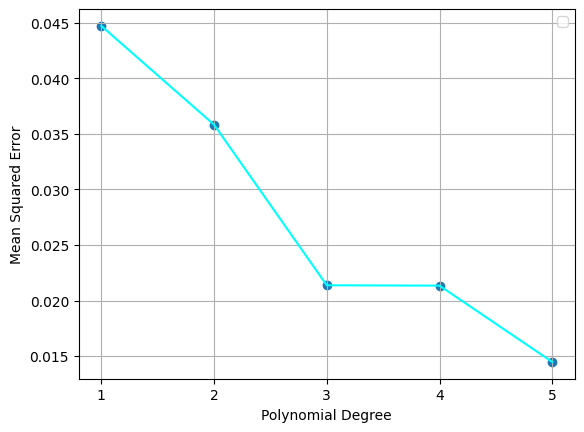

In [1912]:
from matplotlib.ticker import MultipleLocator
#a)
degrees = range(1, 6)
train_mses = []
test_mses = []
lambda_reg = 0.01
y_offset = np.mean(y_train)  # Center y_train

for i in degrees:
    X_train_poly = polynomial_features(x_train, i, intercept=False)
    X_test_poly = polynomial_features(x_test, i, intercept=False)

    X_train_poly_s = scaler.fit_transform(X_train_poly)
    X_test_poly_s = scaler.transform(X_test_poly)

    beta = Ridge_parameters(X_train_poly_s, y_train - y_offset, lambda_reg)

    y_hat_train = X_train_poly_s @ beta + y_offset
    y_hat_test = X_test_poly_s @ beta + y_offset

    # Compute MSE
    mse_train = np.mean((y_train - y_hat_train) ** 2)
    #mse_test = np.mean((y_test - y_hat_test) ** 2)
    
    train_mses.append(mse_train)
    test_mses.append(mse_test)

# Print MSE values
print("Train MSEs:", train_mses)
print("Test MSEs:", test_mses)

plt.plot(degrees,train_mses, color="cyan")
plt.scatter(degrees,train_mses)
#plt.plot(degrees,test_mses, color= "hotpink")
plt.gca().xaxis.set_major_locator(MultipleLocator(1)) 
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()


Train MSEs: [np.float64(0.021385526029215944), np.float64(0.0213778531929149), np.float64(0.021377774662771788), np.float64(0.02137777387563373), np.float64(0.021377773867760512)]


C:\Users\rotki\AppData\Local\Temp\ipykernel_37384\2715834340.py:41: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


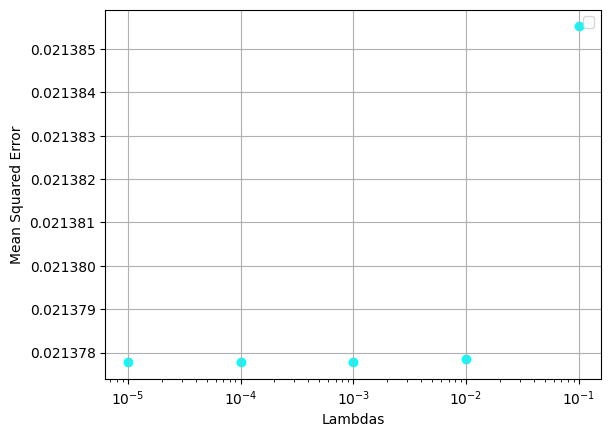

In [1913]:

#b)
lambdas = [10**-1, 10**-2, 10**-3, 10**-4, 10**-5]
train_mses = []
test_mses = []
lambda_reg = 0.01
p= 3
y_offset = np.mean(y_train)  # Center y_train

for i in lambdas:
    X_train_poly = polynomial_features(x_train, p, intercept=False)
    X_test_poly = polynomial_features(x_test, p, intercept=False)

    X_train_poly_s = scaler.fit_transform(X_train_poly)
    X_test_poly_s = scaler.transform(X_test_poly)

    beta = Ridge_parameters(X_train_poly_s, y_train - y_offset, i)

    y_hat_train = X_train_poly_s @ beta + y_offset
    y_hat_test = X_test_poly_s @ beta + y_offset

    # Compute MSE
    mse_train = np.mean((y_train - y_hat_train) ** 2)
    #mse_test = np.mean((y_test - y_hat_test) ** 2)
    
    train_mses.append(mse_train)
    #test_mses.append(mse_test)

# Print MSE values
print("Train MSEs:", train_mses)
#print("Test MSEs:", test_mses)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter(lambdas,train_mses, color="cyan")
#ax.scatter(lambdas,test_mses, color= "hotpink")

ax.set_xscale("log")

plt.xlabel('Lambdas')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

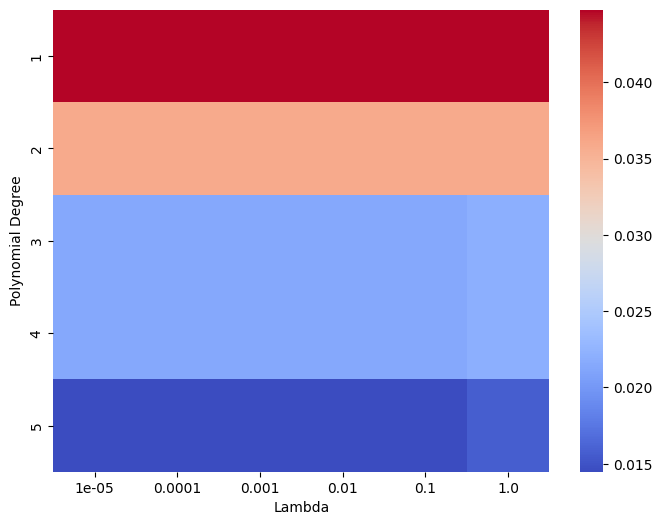

In [1914]:
#c)
import seaborn as sns

lambdas = np.logspace(-5, 0, 6)
degrees = range(1, 6)
degreeXlambda = np.zeros((5, len(lambdas)))


y_offset = np.mean(y_train)  # Center y_train

for i, degree in enumerate(degrees):
    for j, lamb in enumerate(lambdas):
       X_train_poly = polynomial_features(x_train, degree, intercept=False)
       X_test_poly = polynomial_features(x_test, degree, intercept=False)

       X_train_poly_s = scaler.fit_transform(X_train_poly)
       X_test_poly_s = scaler.transform(X_test_poly)

       beta = Ridge_parameters(X_train_poly_s, y_train - y_offset, lamb)

       y_hat_train = X_train_poly_s @ beta + y_offset
       y_hat_test = X_test_poly_s @ beta + y_offset

       # Compute MSE
       mse_train = np.mean((y_train - y_hat_train) ** 2)
       mse_test = np.mean((y_test - y_hat_test) ** 2)
    
       degreeXlambda[i][j] = mse_train


# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    degreeXlambda,
    annot=False,  # Show MSE values in cells
    fmt=".6f",   # Format to 6 decimal places
    cmap="coolwarm",  # Blue (low MSE) to red (high MSE)
    xticklabels=lambdas,
    yticklabels=degrees
)

plt.xlabel("Lambda")
plt.ylabel("Polynomial Degree")
plt.show()
    
